<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Synthetic-datasets" data-toc-modified-id="Synthetic-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Synthetic datasets</a></span><ul class="toc-item"><li><span><a href="#Sound-like-datasets" data-toc-modified-id="Sound-like-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sound-like datasets</a></span></li><li><span><a href="#Diagnosis-datasets" data-toc-modified-id="Diagnosis-datasets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Diagnosis datasets</a></span></li><li><span><a href="#Signal-generation" data-toc-modified-id="Signal-generation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Signal generation</a></span></li></ul></li><li><span><a href="#Plotting-and-visualization" data-toc-modified-id="Plotting-and-visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting and visualization</a></span><ul class="toc-item"><li><span><a href="#Plot-waveform" data-toc-modified-id="Plot-waveform-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot waveform</a></span></li><li><span><a href="#Display-waveform" data-toc-modified-id="Display-waveform-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Display waveform</a></span></li><li><span><a href="#Melspectrograms-with-Sound" data-toc-modified-id="Melspectrograms-with-Sound-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Melspectrograms with <code>Sound</code></a></span></li></ul></li><li><span><a href="#Infinite-waveform-from-spectrum" data-toc-modified-id="Infinite-waveform-from-spectrum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Infinite waveform from spectrum</a></span></li><li><span><a href="#Sample-sounds" data-toc-modified-id="Sample-sounds-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sample sounds</a></span><ul class="toc-item"><li><span><a href="#Random-sample" data-toc-modified-id="Random-sample-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random sample</a></span></li><li><span><a href="#Pure-tone-sample" data-toc-modified-id="Pure-tone-sample-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pure tone sample</a></span></li><li><span><a href="#Triangular-tone-sample" data-toc-modified-id="Triangular-tone-sample-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Triangular tone sample</a></span></li><li><span><a href="#Square-tone-sample" data-toc-modified-id="Square-tone-sample-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Square tone sample</a></span></li><li><span><a href="#Annotated-Waveform" data-toc-modified-id="Annotated-Waveform-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Annotated Waveform</a></span></li></ul></li><li><span><a href="#Voiced-time" data-toc-modified-id="Voiced-time-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Voiced time</a></span></li></ul></div>

This notebook gathers various examples of the functionality of `hum`:
- Synthetic datasets
    - sound-like datasets
    - diagnosis datasets
    - signal generation
- Plotting and visualization
    - plot
    - display
    - melspectrograms
- Infinite waveform from spectrums
- Various sample sounds
- Voiced time

In [1]:
from hum import (mk_sine_wf, 
                 freq_based_stationary_wf, 
                 BinarySound, 
                 WfGen, 
                 TimeSound, 
                 mk_some_buzz_wf, 
                 wf_with_timed_bleeps,
                 Sound,
                 plot_wf,
                 disp_wf,
                 InfiniteWaveform,
                 Voicer, 
                 tell_time_continuously,
                 random_samples,
                 pure_tone,
                 triangular_tone,
                 square_tone,
                 AnnotatedWaveform,
                 gen_words,
                 categorical_gen,
                 bernoulli_gen,
                 create_session,
                 session_to_df
                )
import matplotlib.pyplot as plt
from numpy.random import randint
import numpy as np

## Synthetic datasets
There are several different forms of synthetic data that `hum` can produce to be used in machine learning pipelines, with the first being sound-like datasets generally in the form of sine waves 

### Sound-like datasets

`mk_sine_wf` provides an easy way to generate a simple waveform for synthetic testing purposes

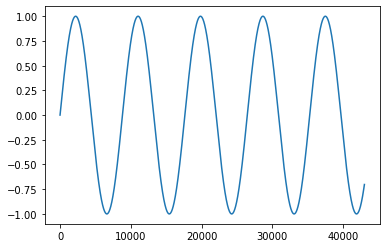

In [2]:
DFLT_N_SAMPLES = 21 * 2048
DFLT_SR = 44100
wf = mk_sine_wf(freq=5, n_samples=DFLT_N_SAMPLES, sr=DFLT_SR, phase=0, gain=1)
plt.plot(wf);

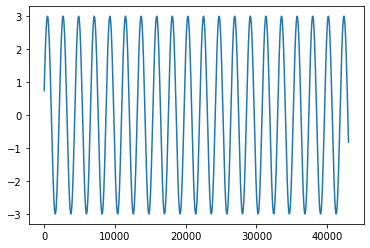

In [3]:
wf = mk_sine_wf(freq=20, n_samples=DFLT_N_SAMPLES, sr=DFLT_SR, phase = 0.25, gain = 3)
plt.plot(wf);

`freq_based_stationary_wf` provides the ability to generate a more complex waveform by mixing sine waves of different frequencies with potentially different weights

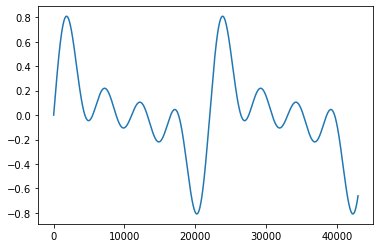

In [4]:
wf_mix = freq_based_stationary_wf(freqs=(2, 4, 6, 8), weights=None,
                             n_samples = DFLT_N_SAMPLES, sr = DFLT_SR)
plt.plot(wf_mix);

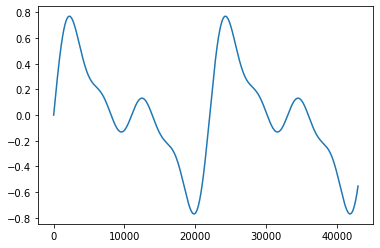

In [5]:
wf_mix = freq_based_stationary_wf(freqs=(2, 4, 6, 8), weights=(3,3,1,1),
                             n_samples = DFLT_N_SAMPLES, sr = DFLT_SR)
plt.plot(wf_mix);

`WfGen` is a class that allows for the generation of sinusoidal waveforms, the generation of lookup tables to be used in generating waveforms, and frequency weighted mixed waveforms

In [6]:
wfgen = WfGen(sr=44100, buf_size_frm=2048, amplitude=0.5)
lookup = np.array(wfgen.mk_lookup_table(freq=880))
wf = wfgen.mk_sine_wf(n_frm=100, freq=880)

In [7]:
np.array(lookup).T

array([ 0.        ,  0.06252526,  0.12406892,  0.1836648 ,  0.24037727,
        0.293316  ,  0.34164989,  0.38462013,  0.42155213,  0.45186607,
        0.47508605,  0.49084754,  0.49890309,  0.49912624,  0.49151348,
        0.47618432,  0.45337943,  0.42345682,  0.38688626,  0.34424188,
        0.29619315,  0.24349441,  0.186973  ,  0.12751624,  0.06605758,
        0.00356187, -0.05898977, -0.12061531, -0.18034728, -0.23724793,
       -0.29042397, -0.33904057, -0.38233448, -0.41962604, -0.45032977,
       -0.47396367, -0.4901567 , -0.49865463, -0.49932406, -0.49215447,
       -0.47725843, -0.45486979, -0.42534003, -0.38913276, -0.34681639,
       -0.29905527, -0.2465992 , -0.19027171, -0.13095709, -0.06958655])

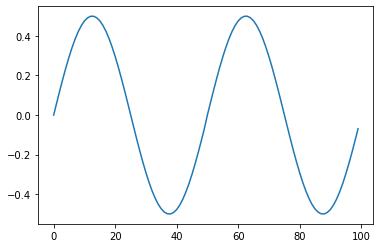

In [8]:
plt.plot(wf);

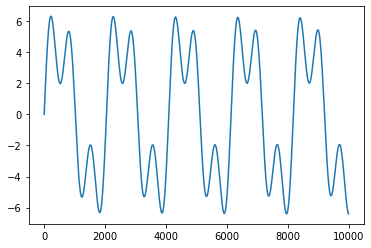

In [9]:
wf_weight = wfgen.mk_wf_from_freq_weight_array(n_frm=10000, freq_weight_array=(10,1,6))
plt.plot(wf_weight);

### Diagnosis datasets
`hum` can also produce diagnosis datasets to be applied to machine learning pipelines

`BinarySound` is a class that generates binary waveforms

True

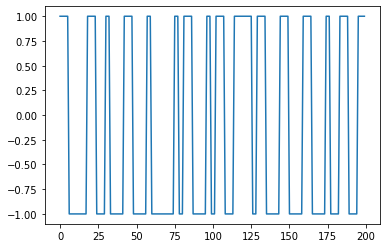

In [10]:
bs = BinarySound(nbits=50, redundancy=142, repetition=3, header_size_words=1)
utc = randint(0,2,50)
wf = bs.mk_phrase(utc)
plt.plot(wf[:200]);
all(bs.decode(wf) == utc)

`BinarySound` can also be instantiated using audio parameters using the `for_audio_params` class method

True

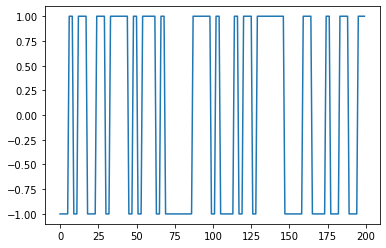

In [11]:
bs = BinarySound.for_audio_params(nbits=50, freq=6000, chk_size_frm=43008, sr=44100, header_size_words=1)
wf = bs.mk_phrase(utc)
plt.plot(wf[:200]);
all(bs.decode(wf) == utc)

utc phrases can be generated using `mk_utc_phrases` when `BinarySound` is instantiated with audio parameters

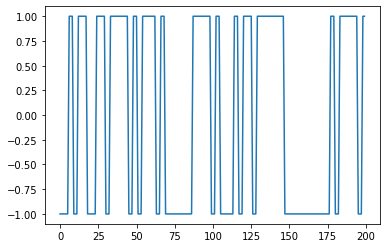

In [12]:
plt.plot(bs.mk_utc_phrases()[:200]);

`TimeSound` is a class that generates timestamped waveform data

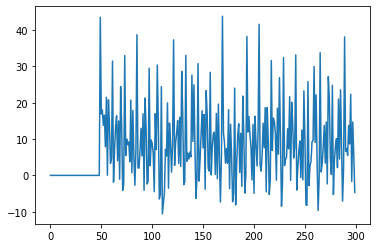

In [13]:
time = TimeSound(sr=44100, buf_size_frm=2048, amplitude=0.5, n_ums_bits=30)
wf = time.timestamped_wf()
plt.plot(wf[2000:2300]);

`mk_some_buzz_wf` and `wf_with_timed_bleeps` are two more options to generate synthetic data of diagnosis sounds

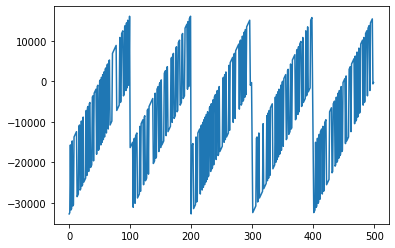

In [14]:
wf = mk_some_buzz_wf(sr=DFLT_SR)
plt.plot(wf[:500]);

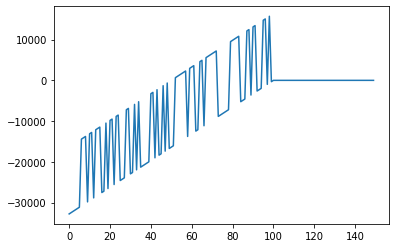

In [15]:
wf = wf_with_timed_bleeps(n_samples=DFLT_SR*2, bleep_loc=400, bleep_spec=100, sr=DFLT_SR)
plt.plot(wf[:150]);

### Signal generation

`hum` can create signals generated by sequences of symbols, perturbed by outliers injected at given points

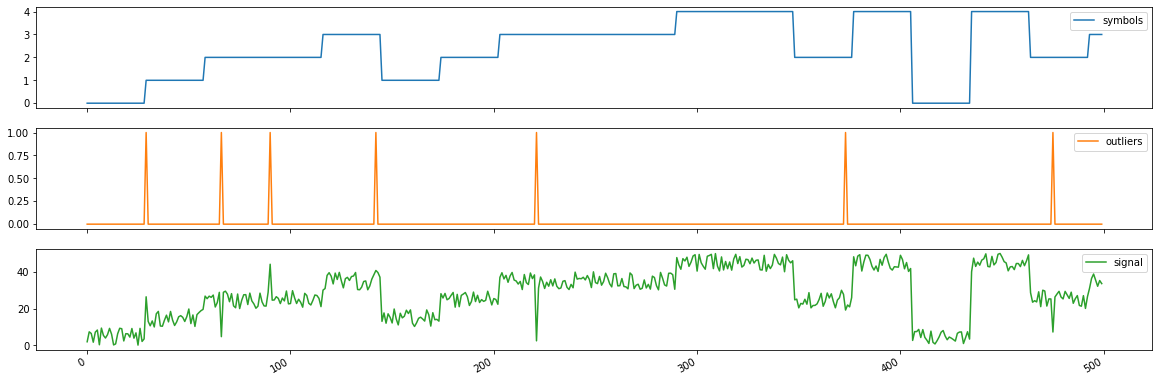

In [16]:
symb_res = categorical_gen(gen_words)
out_res = bernoulli_gen(p_out=0.01)
df = session_to_df(create_session(symb_res, out_res, alphabet=list('abcde'), session_length=500))
df.plot(subplots=True, figsize=(20,7));

## Plotting and visualization
`hum` also provides several options for plotting and visualization for the synthetic datasets it generates

In [17]:
wfgen = WfGen()
wf = list()
for i in range(1, 1000, 20):
    wf.extend(list(wfgen.mk_sine_wf(n_frm=2048, freq=i)))
wf = np.array(wf)
sr = 44100

### Plot waveform

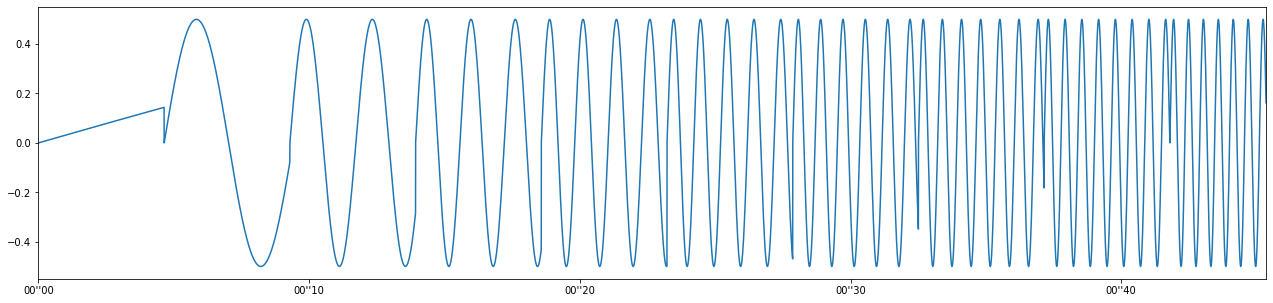

In [18]:
plot_wf(wf[:20000], sr)

### Display waveform

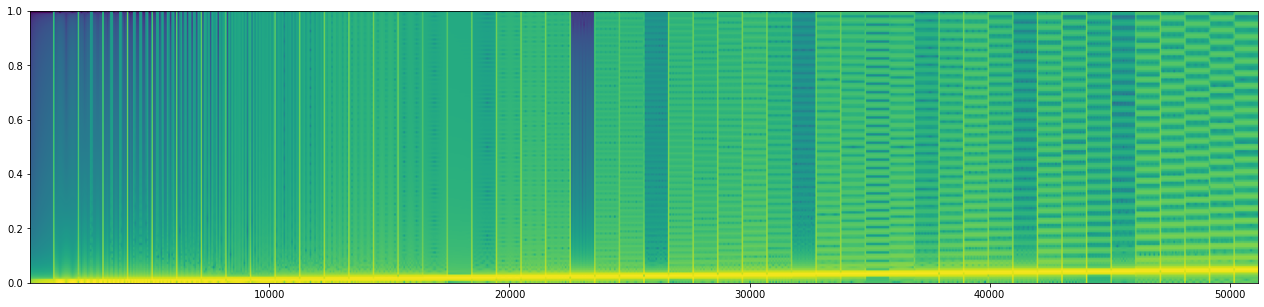

In [19]:
disp_wf(wf, sr)

### Melspectrograms with `Sound`

In [20]:
snd = Sound(wf=wf, sr=sr)

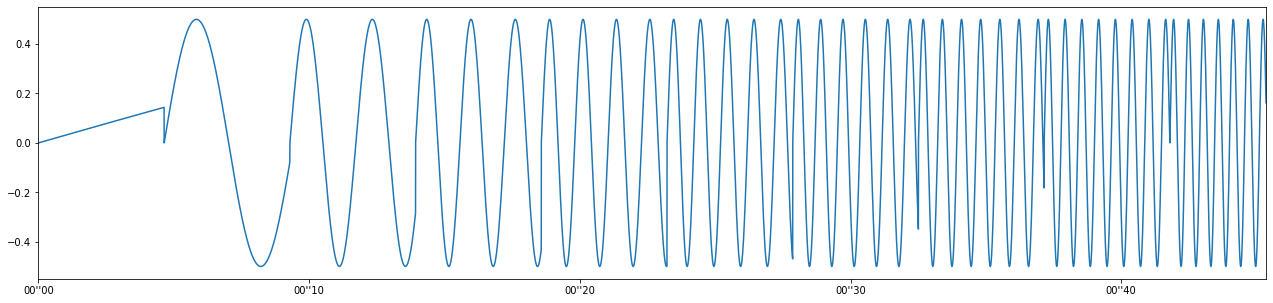

In [21]:
snd.plot_wf(wf=wf[:20000], sr=sr)

In [22]:
snd.melspectrogram(plot_it=False)

array([[-63.34856485, -45.14910401, -36.14726097, ..., -80.        ,
        -73.35788085, -60.58728436],
       [-67.99632241, -74.80503122, -80.        , ..., -80.        ,
        -72.1600597 , -60.16803079],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -72.90050429, -60.90871386],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

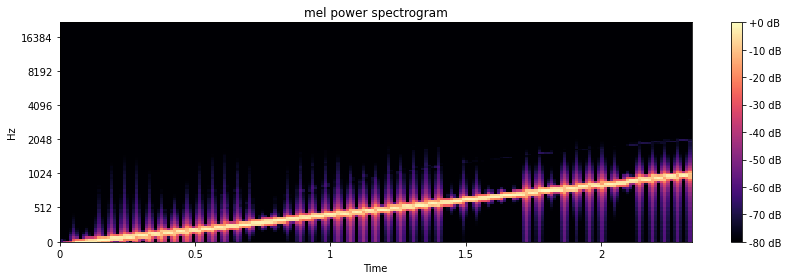

In [23]:
snd.display()

## Infinite waveform from spectrum
`hum` also provides the functionality to create an infinite waveform based on a given spectrum, and a noise amplifier if desired

In [24]:
iwf = InfiniteWaveform(wf)

In [25]:
wf = list(iwf.query(0,500000))

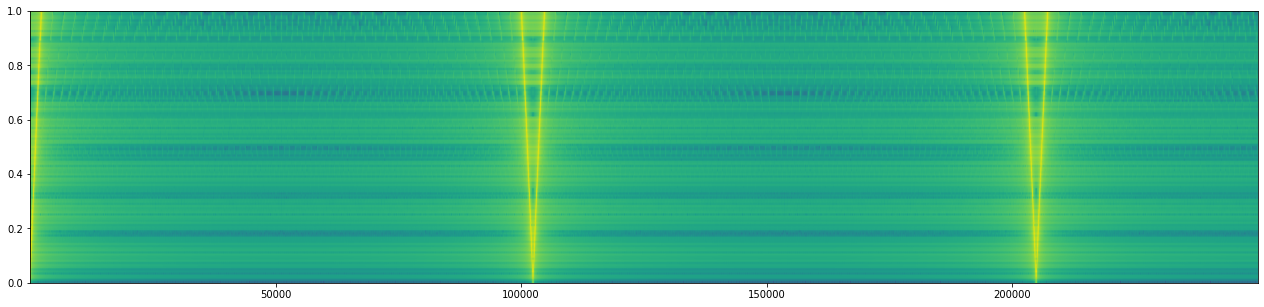

In [26]:
disp_wf(wf)

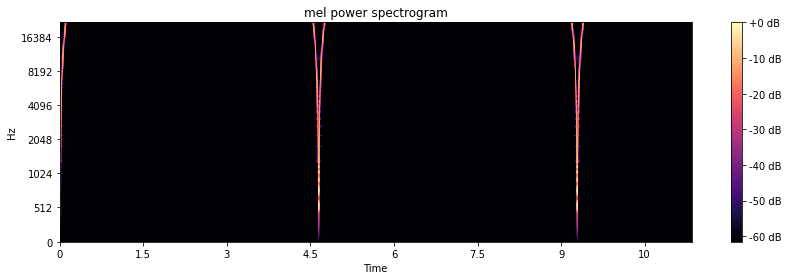

In [27]:
Sound(wf=wf).display()

## Sample sounds
`hum` also provides several functions to generate sample sounds shown below

### Random sample

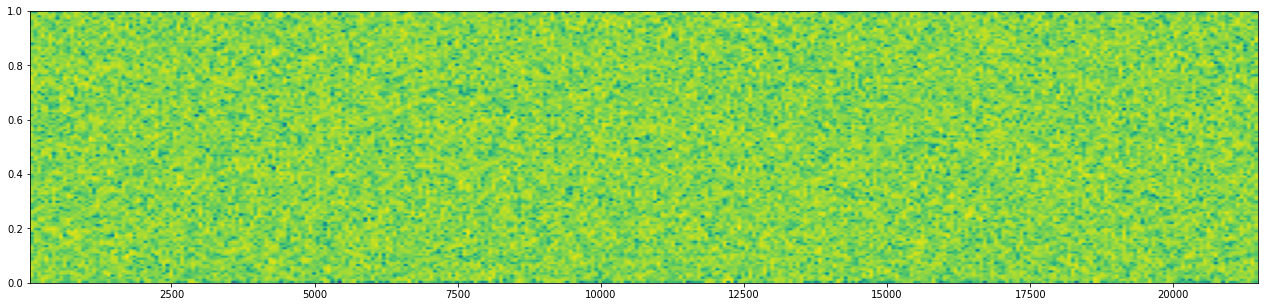

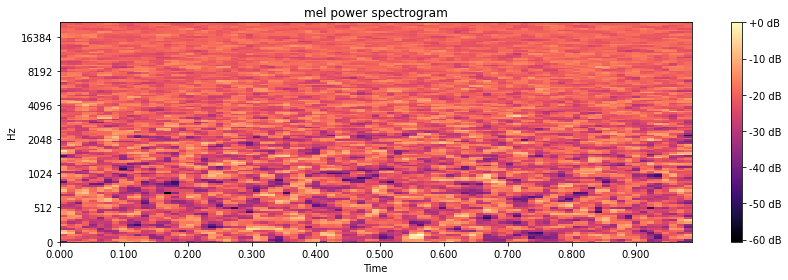

In [28]:
wf = random_samples(chk_size_frm=21*2048, max_amplitude=30000)
disp_wf(wf=wf, sr=sr)
Sound(wf=wf).display()

### Pure tone sample

/Users/owenlloyd/opt/anaconda3/envs/oto3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


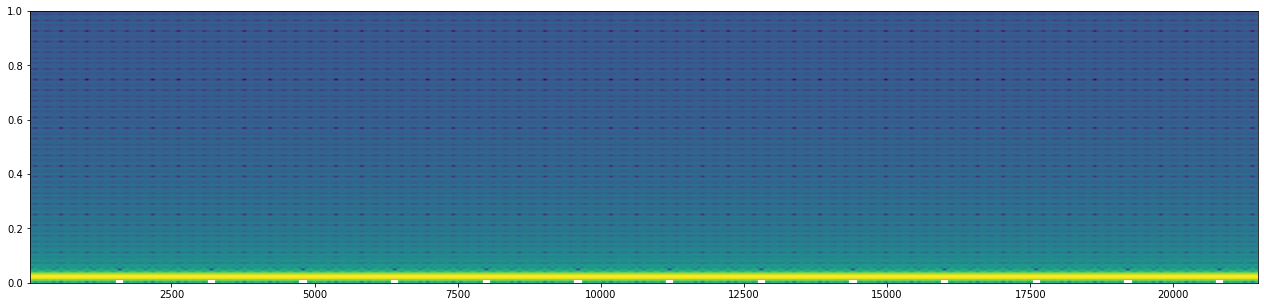

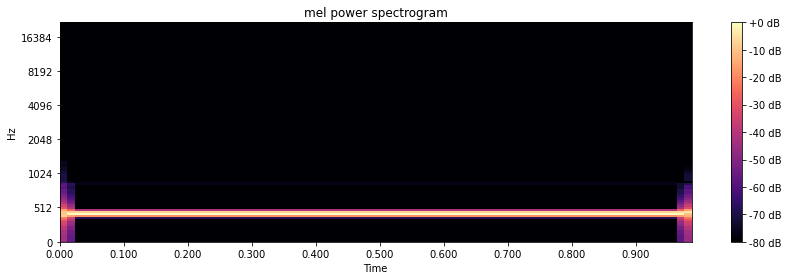

In [29]:
wf = pure_tone(chk_size_frm=21*2048, freq=440, sr=44100, max_amplitude=30000)
disp_wf(wf=wf, sr=sr)
Sound(wf=wf).display()

### Triangular tone sample

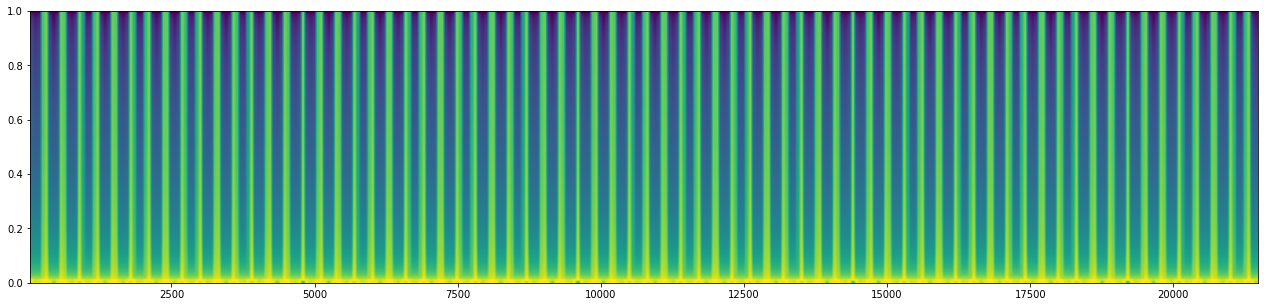

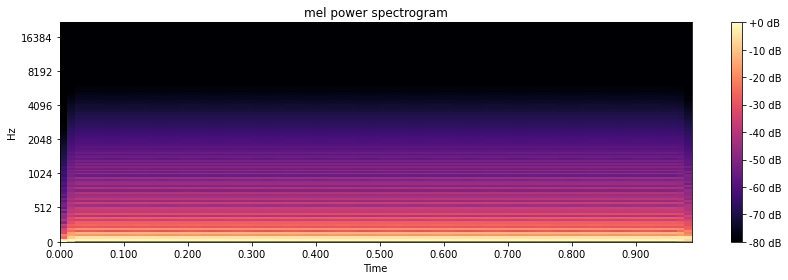

In [30]:
wf = triangular_tone(chk_size_frm=21*2048, freq=440, sr=44100, max_amplitude=30000)
disp_wf(wf=wf, sr=sr)
Sound(wf=wf).display()

### Square tone sample

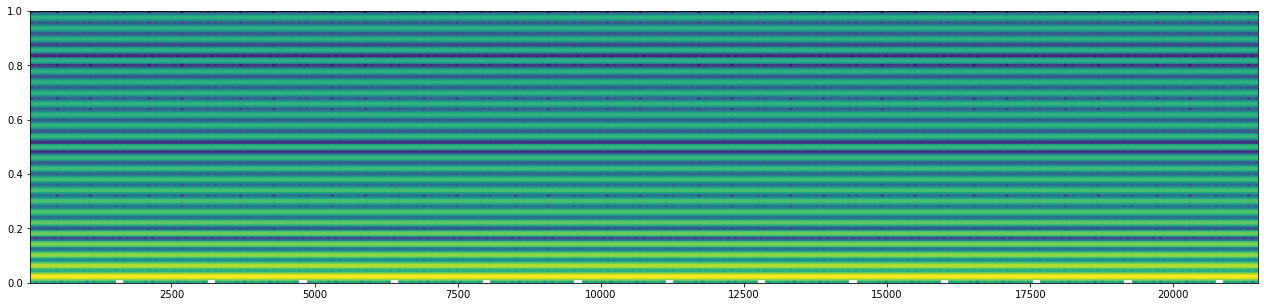

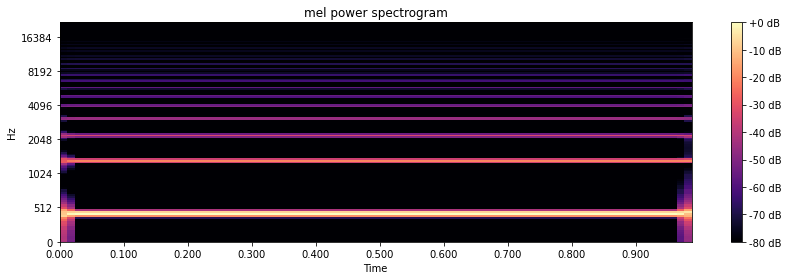

In [31]:
wf = square_tone(chk_size_frm=21*2048, freq=440, sr=44100, max_amplitude=30000)
disp_wf(wf=wf, sr=sr)
Sound(wf=wf).display()

### Annotated Waveform

In [32]:
awf = AnnotatedWaveform(chk_size_frm=21*2048, freq=440, sr=44100, max_amplitude=30000)
gen = awf.chk_and_tag_gen()
list(gen)

[(array([-14025,  11555,  22270, ...,  10243, -18225,   3874], dtype=int16),
  'random'),
 (array([    0,  1902,  3797, ...,  9361, 11149, 12893], dtype=int16),
  'pure_tone'),
 (array([-30000, -29900, -29800, ...,  10500,  10600,  10700], dtype=int16),
  'triangular_tone'),
 (array([30000, 30000, 30000, ..., 30000, 30000, 30000], dtype=int16),
  'square_tone')]

In [33]:
awf.get_wf_and_annots()

(array([  5183,  10421, -21645, ...,  30000,  30000,  30000], dtype=int16),
 {'random': [(0, 43008)],
  'pure_tone': [(43008, 86016)],
  'triangular_tone': [(86016, 129024)],
  'square_tone': [(129024, 172032)]})

## Voiced time
Finally `hum` provides a function that will tell the time continuously with parameters for the frequency, speed, voice, volume, and time format

In [34]:
tell_time_continuously(every_secs=5, verbose=True)

15 45 11
15 45 16
15 45 21
15 45 26
KeyboardInterrupt!!!
